In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice

In [2]:
# SPICE test
spice.tkvrsn('TOOLKIT')

'CSPICE_N0067'

In [3]:
import sys

# import SPICE user lib
sys.path.append('../lib/')
import vex_spice_lib as vex
import my_spice_lib as my

In [4]:
vex.spice_ini()

In [5]:
# set date/time
utctim = '2014-03-15T15:20:00'    # start date/time
nday = 18.0/60/24                 # number of day
dt = 60                  # time step [second]

et_ex = spice.str2et(utctim)
nd = int((60*60*24*nday) / dt)
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = my.get_pos_pso(
    et, ref='IAU_VENUS', tar='VEX', org='VENUS', corr='LT+S')

Text(0, 0.5, 'Z [km]')

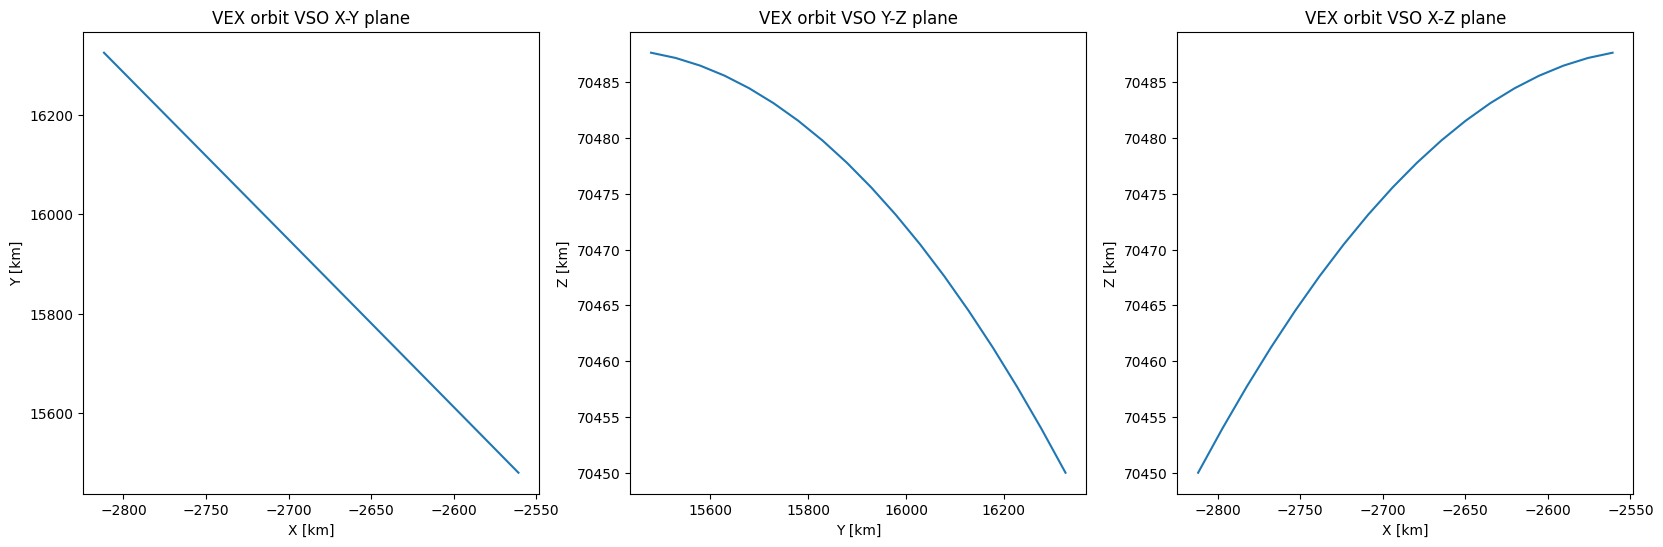

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(20.0, 6.0))

ax1.plot(x, y)
ax1.set_title('VEX orbit VSO X-Y plane')
ax1.set_xlabel('X [km]')
ax1.set_ylabel('Y [km]')

ax2.plot(y, z)
ax2.set_title('VEX orbit VSO Y-Z plane')
ax2.set_xlabel('Y [km]')
ax2.set_ylabel('Z [km]')

ax3.plot(x, z)
ax3.set_title('VEX orbit VSO X-Z plane')
ax3.set_xlabel('X [km]')
ax3.set_ylabel('Z [km]')


Text(0, 0.5, '[km]')

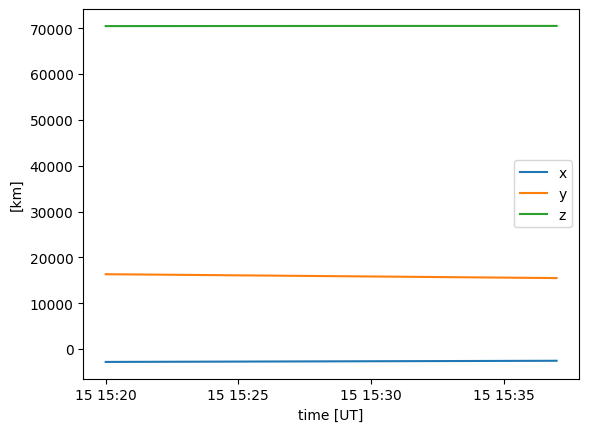

In [7]:
td = spice.et2datetime(et)

plt.plot(td, x, label='x')
plt.plot(td, y, label='y')
plt.plot(td, z, label='z')

plt.legend()
plt.xlabel('time [UT]')
plt.ylabel('[km]')


In [8]:
[x_vso, y_vso, z_vso, r_vso, lat_vso, lon_vso] = my.get_pos(et, ref='VSO', tar='VEX', org='VENUS')

SpiceUNKNOWNFRAME: 
================================================================================

Toolkit version: CSPICE_N0067

SPICE(UNKNOWNFRAME) --

The requested output frame 'VSO' is not recognized by the reference frame subsystem. Please check that the appropriate kernels have been loaded and that you have correctly entered the name of the output frame.

spkezr_c --> SPKEZR --> SPKEZ

================================================================================

In [ ]:
td = spice.et2datetime(et)

plt.plot(td, x_vso, label='x')
plt.plot(td, y_vso, label='y')
plt.plot(td, z_vso, label='z')

plt.legend()
plt.xlabel('time [UT]')
plt.ylabel('VSO [km]')